# Taller 1: operaciones elementales sobre imágenes

## Genere una imagen de 256x256x1 con valores 255 y 0 de color blanco. Genere una cuadrícula de 8x8 negra de 2 pixeles de grosor a lo largo de toda la imagen. Visualice el resultado.

Iniciamos creando la imagen en blanco. Luego, calculamos el tamaño de cada celda en la cuadícula 8x8. El resultado son celdas de 32 píxeles. Terminamos trazando las líneas horizontales y verticales.

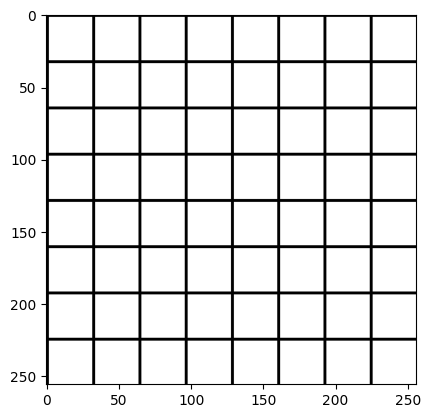

In [5]:
import numpy as np
import matplotlib.pyplot as plt

imagen_cuadricula = np.full((256, 256), 255, dtype=np.uint8)

# Cada celda es de 256/8 = 32 píxeles
espaciado = 256 // 8  # 32 píxeles

# Dibujar líneas horizontales
for i in range(0, 9):  # 0 a 8 para tener 9 líneas (bordes + internas)
    pos = i * espaciado
    if pos < 256:
        # Línea de 2 píxeles de grosor
        imagen_cuadricula[pos:min(pos+2, 256), :] = 0

# Dibujar líneas verticales
for j in range(0, 9):
    pos = j * espaciado
    if pos < 256:
        # Línea de 2 píxeles de grosor
        imagen_cuadricula[:, pos:min(pos+2, 256)] = 0

# Visualizar
plt.imshow(imagen_cuadricula, cmap='gray')
plt.show()

## Haga un submuestreo de esta imagen a la mitad de su dimensión (número de filas y columnas): 128x128x1, conservando el tamaño físico (en cm) de la misma. Utilice la función resize de python-opencv.  Visualice el resultado. ¿Cuál es la nueva resolución de la imagen (tamaño del pixel)? ¿Cómo explica este efecto?

In [7]:
import cv2
imagen_128 = cv2.resize(imagen_cuadricula, (128, 128), interpolation=cv2.INTER_NEAREST)

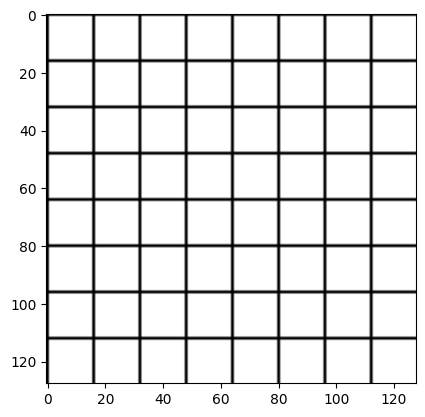

In [9]:
plt.imshow(imagen_128, cmap='gray')
plt.show()

El tamaño del nuevo píxel en la imagen de 128x128 pasa a ser del doble (más grande) frente a la cuadrícula original. También se puede interpretar como tener menos píxeles por cuadrícula (o por área). La interpolación de INTER_NEAREST hace que tomemmos 1 de cada píxeles (N4), lo que hace que se pierdan píxeles y por lo tanto información.

## Seleccione tres técnicas de interpolación (incluya Nearest Neighbor) y observe el efecto en la imagen resultado. Comente el resultado basado en la apariencia de la imagen y los niveles de gris de sus píxeles. Investigue en qué consisten cada una de estas técnicas de interpolación.

El punto anterior lo hicimos con Nearest Neighbor, por lo cual vamos a añadir otras 3 técnicas y compararlas todas.

In [12]:
# Probar diferentes interpolaciones
imagen_nearest = cv2.resize(imagen_cuadricula, (128, 128), interpolation=cv2.INTER_NEAREST)
imagen_linear = cv2.resize(imagen_cuadricula, (128, 128), interpolation=cv2.INTER_LINEAR)
imagen_cubic = cv2.resize(imagen_cuadricula, (128, 128), interpolation=cv2.INTER_CUBIC)
imagen_area = cv2.resize(imagen_cuadricula, (128, 128), interpolation=cv2.INTER_AREA)


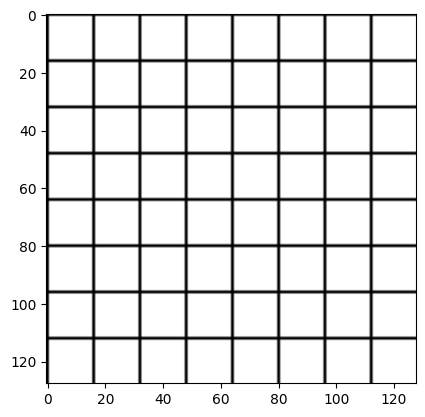

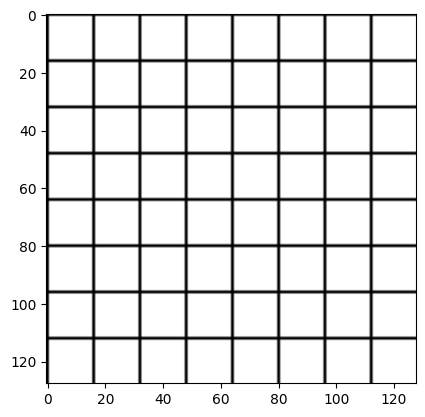

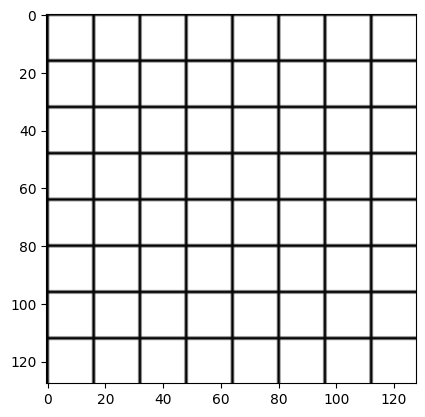

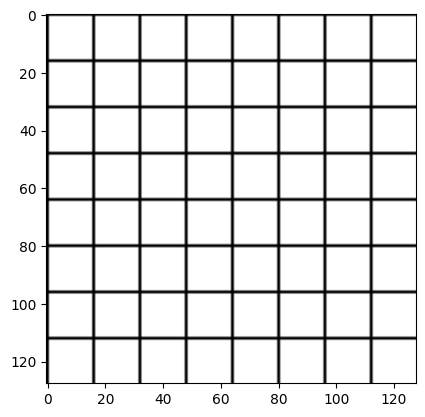

In [13]:
plt.imshow(imagen_nearest, cmap='gray')
plt.show()
plt.imshow(imagen_linear, cmap='gray')
plt.show()
plt.imshow(imagen_cubic, cmap='gray')
plt.show()
plt.imshow(imagen_area, cmap='gray')
plt.show()

Referenciamos las definiciones de un blog de OpenCV:

| Method | Description | Best Used For |
|--------|-------------|---------------|
| `INTER_NEAREST` | Nearest-neighbor interpolation (fastest, but low quality) | Simple, fast resizing (e.g., pixel art, binary images) |
| `INTER_LINEAR` | Bilinear interpolation (default method) | General-purpose resizing (good balance of speed & quality) |
| `INTER_CUBIC` | Bicubic interpolation (uses 4×4 pixel neighborhood) - N8| High-quality upscaling, smoother results |
| `INTER_AREA` | Resampling using pixel area relation | Best for shrinking images (avoids aliasing) |

*Fuente: [OpenCV - Resizing and Rescaling Images](https://opencv.org/blog/resizing-and-rescaling-images-with-opencv/)*

En esta definición, tenemos el concepto de *Aliasing*, el cual significa una distorsión que ocurre cuando se muestrea una señal (o imagen) con una frecuencia insuficiente, perdiendo información y creando artefactos visuales no deseados. Por ejemplo, esto puede hacer que se pierdan detalles finos o patrones de la imagen dado que se reduce el número de píxeles por el submuestreo. Ahora bien, el efecto es díficil de notar en este ejercicio a simple vista. En general se espera una mejor calidad de las técinas `INTER_AREA` e `INTER_CUBIC`, en cambio, `INTER_NEAREST` e `INTER_LINEAR` ofrecen resultados más rápidos y fáciles de calcular.

## Repita 3 y 4 submuestreando la imagen original a 100x100x1. Visualice los resultados con los diferentes filtros. ¿Qué diferencias observa entre esta imagen y las obtenidas anteriormente?

In [15]:
# Probar diferentes interpolaciones
imagen_nearest_100 = cv2.resize(imagen_cuadricula, (100, 100), interpolation=cv2.INTER_NEAREST)
imagen_linear_100 = cv2.resize(imagen_cuadricula, (100, 100), interpolation=cv2.INTER_LINEAR)
imagen_cubic_100 = cv2.resize(imagen_cuadricula, (100, 100), interpolation=cv2.INTER_CUBIC)
imagen_area_100 = cv2.resize(imagen_cuadricula, (100, 100), interpolation=cv2.INTER_AREA)

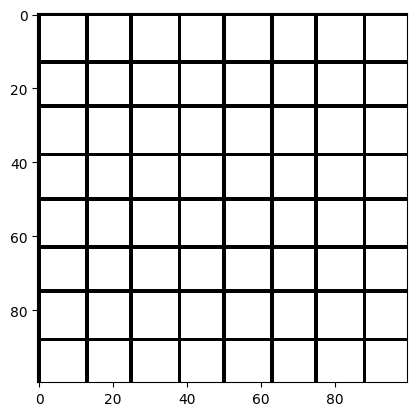

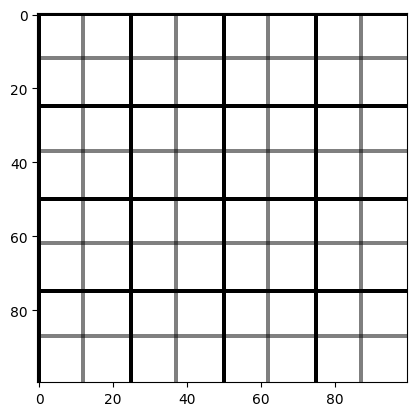

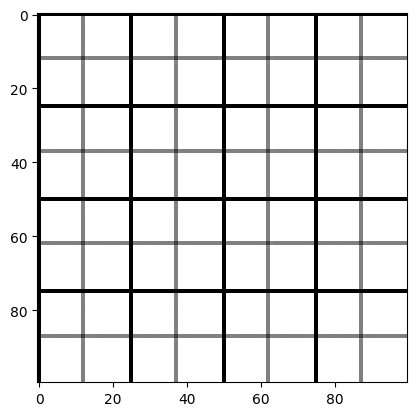

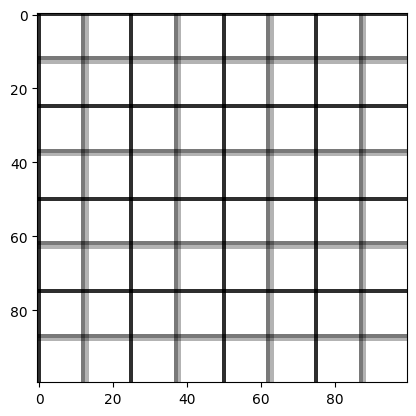

In [16]:
plt.imshow(imagen_nearest_100, cmap='gray')
plt.show()
plt.imshow(imagen_linear_100, cmap='gray')
plt.show()
plt.imshow(imagen_cubic_100, cmap='gray')
plt.show()
plt.imshow(imagen_area_100, cmap='gray')
plt.show()

Al cambiar las dimensiones del submuestreo, podemos ver distorsiones en la imagen de acuerdo a la técnica implementada. Con `INTER_NEAREST` vemos como quedan unos bordes más delgados que otros y las cuadrículas ya son rectángulos en vez de cuadrados. Con `INTER_LINEAR` y `INTER_CUBIC` vemos que tonos de grises más claros, porque en la interpolación se promedian los tonos de los vecinos. En `INTER_AREA`vemos cómo los bordes se hacen más gruesos de forma artifical, también porque se consideran los valores de varios vecinos.
En este ejercicio es mucho más notable el efecto de las interpolaciones, en comparación con el ejercicio de (128x128) donde se mantienen las proporciones de las dimensiones.

## Cargue y visualice la imagen de trabajo.

In [18]:
# Modificar las rutas de las imagenes.
PATH_IMAGES = "./imagenes/"

libpng warning: iCCP: profile 'icc': 'GRAY': Gray color space not permitted on RGB PNG


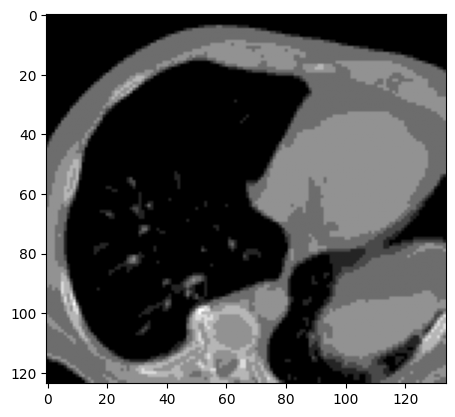

In [19]:
imagen_Torax= cv2.imread(PATH_IMAGES + "Torax.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(imagen_Torax, cmap='gray')
plt.show()

## Submuestree esta imagen para que tenga dimensiones 34x31. Cambie los diferentes interpoladores del filtro y observe las diferencias entre la imagen original y la imagen resultado. ¿Cuáles son sus conclusiones?

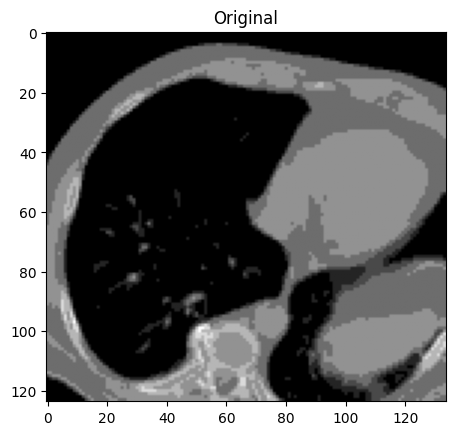

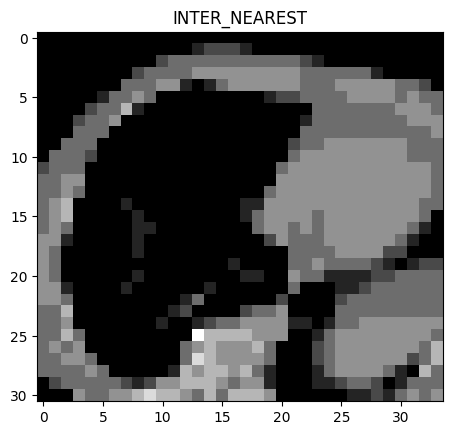

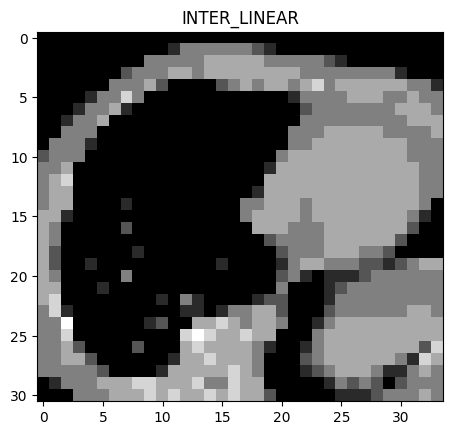

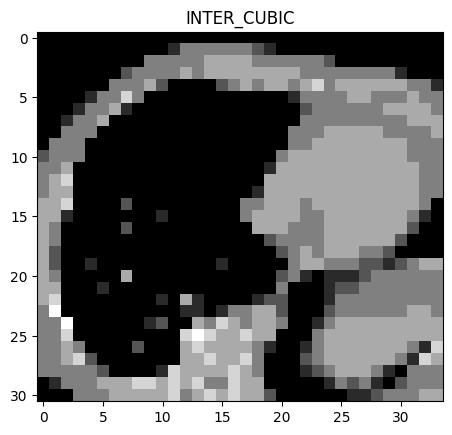

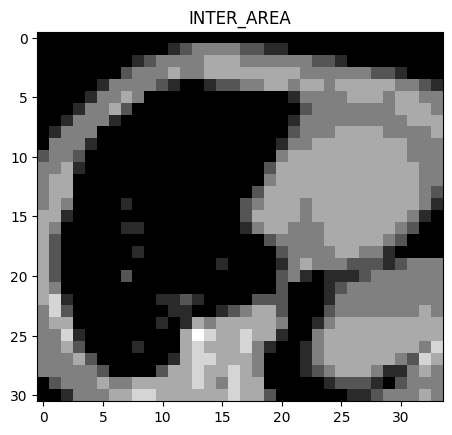

In [20]:
imagen_torax_nearest = cv2.resize(imagen_Torax, (34, 31), interpolation=cv2.INTER_NEAREST)
imagen_torax_linear = cv2.resize(imagen_Torax, (34, 31), interpolation=cv2.INTER_LINEAR)
imagen_torax_cubic = cv2.resize(imagen_Torax, (34, 31), interpolation=cv2.INTER_CUBIC)
imagen_torax_area = cv2.resize(imagen_Torax, (34, 31), interpolation=cv2.INTER_AREA)

# Visualizar imagen original
plt.imshow(imagen_Torax, cmap='gray')
plt.title('Original')
plt.show()

# Visualizar resultados
plt.imshow(imagen_torax_nearest, cmap='gray')
plt.title('INTER_NEAREST')
plt.show()

plt.imshow(imagen_torax_linear, cmap='gray')
plt.title('INTER_LINEAR')
plt.show()

plt.imshow(imagen_torax_cubic, cmap='gray')
plt.title('INTER_CUBIC')
plt.show()

plt.imshow(imagen_torax_area, cmap='gray')
plt.title('INTER_AREA')
plt.show()

Con una reducción tan pronunciada de la imagen del tórax a 34x31 píxeles, se pierde gran cantidad de información independientemente del método de interpolación usado. `INTER_NEAREST` genera una imagen bastante pixelada con bordes muy marcados y fragmentados, siendo la peor calidad. `INTER_LINEAR` y `INTER_CUBIC` producen resultados más suaves con menos pixelación, aunque `INTER_CUBIC` muestra diferencias mínimas con `INTER_LINEAR` en esta escala tan reducida. `INTER_AREA` ofrece el mejor resultado visual, manteniendo las estructuras anatómicas más reconocibles y con transiciones entre regiones.


## Ahora haga un remuestreo de la misma imagen, conservando el tamaño físico (en cm) de la misma. Para esto: convierta primero la imagen a su tamaño original (134x124 en x, y). Note que el tamaño del pixel es 1x1. Ahora, duplique su dimensión (número de filas y columnas). ¿Cuál es la nueva resolución de la imagen (tamaño del pixel)? Cómo explica este efecto? Compare la técnica de interpolación NearestNeighbor con Cubic B-spline haciendo énfasis en el efecto que se observa en los contornos de las diferentes regiones. ¿Cuáles son sus conclusiones?

Empezamos redimensionando la imagen al tamaño original de 134x124. El tamaño del del píxel original es 1x1.

Dimensiones originales: (124, 134)


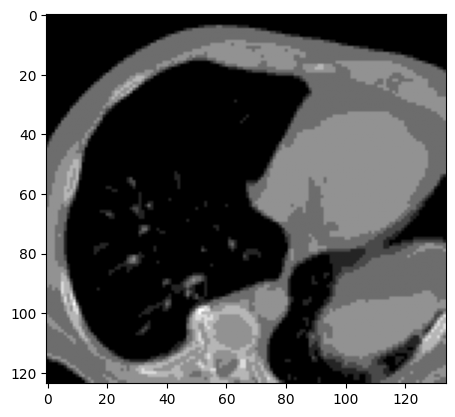

In [25]:
imagen_torax_original = cv2.resize(imagen_Torax, (134, 124))
print(f"Dimensiones originales: {imagen_torax_original.shape}")

plt.imshow(imagen_torax_original, cmap='gray')

Luego, hacemos resize para duplicar las dimensiones a 268x248 usando `INTER_NEAREST` e `INTER_CUBIC`.

In [ ]:
imagen_torax_nearest_2x = cv2.resize(imagen_torax_original, (268, 248), interpolation=cv2.INTER_NEAREST)
imagen_torax_cubic_2x = cv2.resize(imagen_torax_original, (268, 248), interpolation=cv2.INTER_CUBIC)

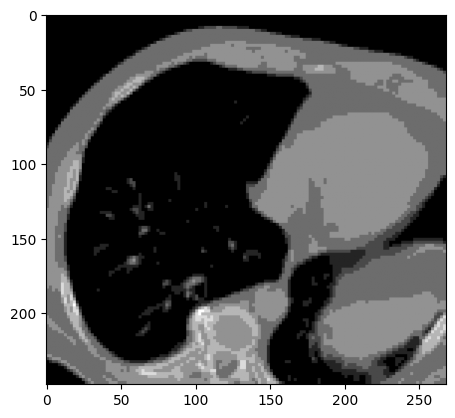

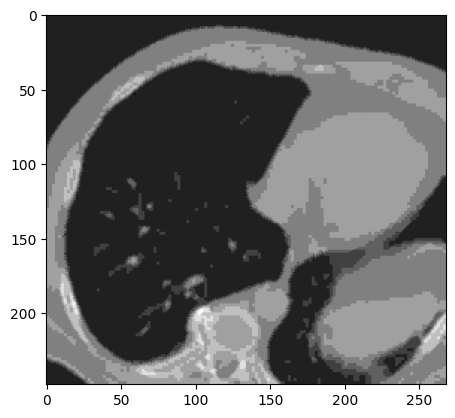

In [27]:
plt.imshow(imagen_torax_nearest_2x, cmap='gray')
plt.show()
plt.imshow(imagen_torax_cubic_2x, cmap='gray')
plt.show()

El nuevo tamaño del píxel es 0.5x0.5, es decir, la mitad del tamaño original. Al duplicar las dimensiones conservando el tamaño físico, cada píxel se divide en 4 píxeles más pequeños, duplicando la resolución.

Comparando entre `INTER_NEAREST` e `INTER_CUBIC`, notamos que `INTER_NEAREST` se ve mucho más pixelado, especialmente en los contornos de las diferentes regiones que vemos en la imagen. En cambio, los contornos en `INTER_CUBIC` se ven suavizados, ya que vemos la degradación entre píxeles y no son cambios abruptos de intensidad.

En conclusión, `INTER_CUBIC` es mejor para ampliar imágenes, ya que hay transiciones entre píxeles menos abruptas y se diferencian mejor las regiones de las imágenes al tener contornos mejor redimensionados.